In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Read and load data
def load_data(file_path):
    try:
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        print('File not found.')
        return None 

data = load_data('netflix_titles.csv')
print(data)

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [119]:
def basic_data_explore(data):
    # Display the shape of the dataset (rows, columns)
    shape = data.shape
    print(f"\nThere are {shape[0]} rows and {shape[1]} columns in the dataset.")

    # Display the types in the dataset
    print(f"\nData Types:\n{data.dtypes}\n")

    # Display the columns in the dataset
    print(data.describe())
    
basic_data_explore(data)


There are 8807 rows and 12 columns in the dataset.

Data Types:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [120]:
def data_cleaning_and_handling_missing_values(data):
    # Display the missing values in the dataset
    missing_values = data.isnull().sum()
    print(f"\nMissing Values:\n{missing_values}\n")

    # Drop columns that are not needed
    df = data.drop(columns=['date_added', 'show_id', 'description', 'listed_in'])

    # Fill missing values in the 'director' column with 'Unknown'
    df['director'] = df['director'].fillna('Unknown')
    
    return df

df = data_cleaning_and_handling_missing_values(data)


Missing Values:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64



In [121]:
def analyze_and_manipulate_data(df):
    # Count the number of movies and TV shows
    movie_counts = df[df['type'] == 'Movie'].shape[0]
    tv_counts = df[df['type'] == 'TV Show'].shape[0]
    print(f"\nMovies: {movie_counts} films\nTV Shows: {tv_counts} shows\n")

    # Display the top 5 directors (Including Unknown)
    top_5_directors = df['director'].value_counts().head(6)
    print(f"\nTop 5 Directors:\n{top_5_directors}\n")

    # Display the average movie duration
    df['duration_num'] = df[df['type'] == 'Movie']['duration'].str.extract(r'(\d+)').astype(float)
    avg_duration = df['duration_num'].mean()
    print(f"\nAverage Movie Duration: {avg_duration:.2f} minutes")

analyze_and_manipulate_data(data)


Movies: 6131 films
TV Shows: 2676 shows


Top 5 Directors:
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Name: count, dtype: int64


Average Movie Duration: 99.58 minutes


Visualize Using Matplotlib

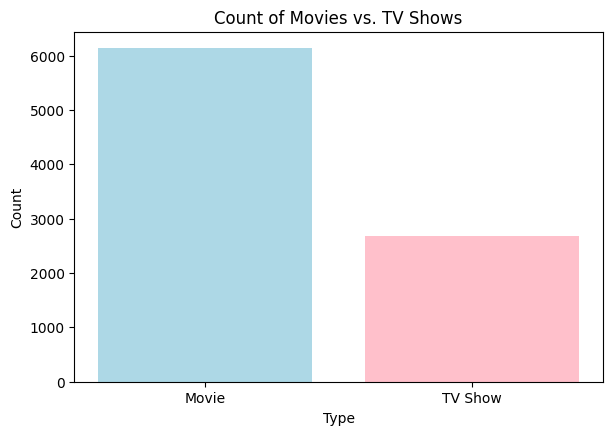

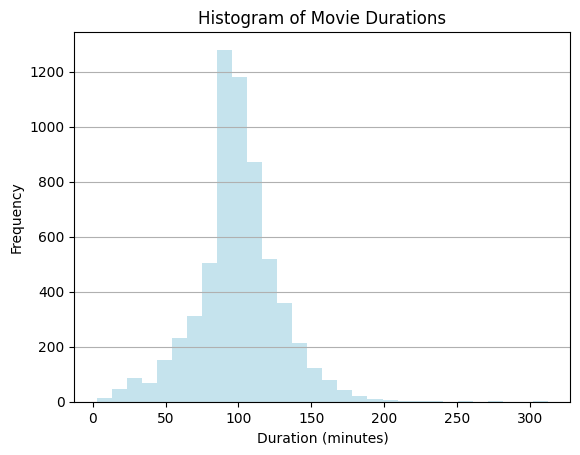

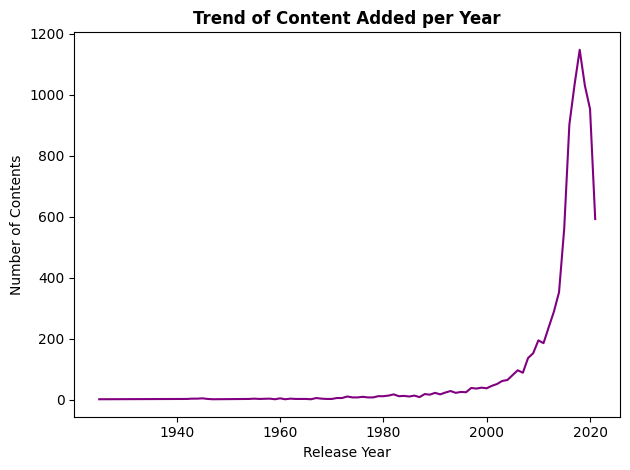

In [122]:
def data_visualization_matplotlib(df):
    # Bar Chart: Count of Movies vs. TV Shows
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    content_counts = df['type'].value_counts()
    plt.bar(content_counts.index, content_counts.values, color=['lightblue', 'pink'])
    plt.title('Count of Movies vs. TV Shows')
    plt.xlabel('Type')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

    # Clean and convert the duration column for movies
    df['duration'] = df['duration'].str.replace(' min', '', regex=False)
    df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

    # Histogram: Movie Durations
    plt.hist(df['duration'].dropna(), bins=30, color='lightblue', alpha=0.7)
    plt.title('Histogram of Movie Durations')
    plt.xlabel('Duration (minutes)')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

    # Count of content added per year (trend)
    content_per_year = df['release_year'].value_counts().sort_index()
    content_per_year.plot(kind='line', color='purple')
    plt.title('Trend of Content Added per Year', weight="bold")
    plt.xlabel('Release Year')
    plt.ylabel('Number of Contents')

    plt.tight_layout()
    plt.show()


data_visualization_matplotlib(df)

Visualize Using Seaborn

/var/folders/dk/m0585cnj6bxf9cc10m_lgf2w0000gn/T/ipykernel_1295/3673177930.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette=['lightblue', 'pink'])


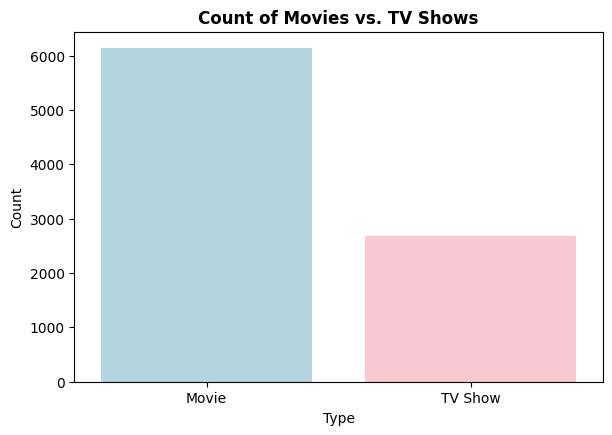

/var/folders/dk/m0585cnj6bxf9cc10m_lgf2w0000gn/T/ipykernel_1295/3673177930.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='duration', y='type', data=df[df['type'] == 'Movie'], palette='Set2')


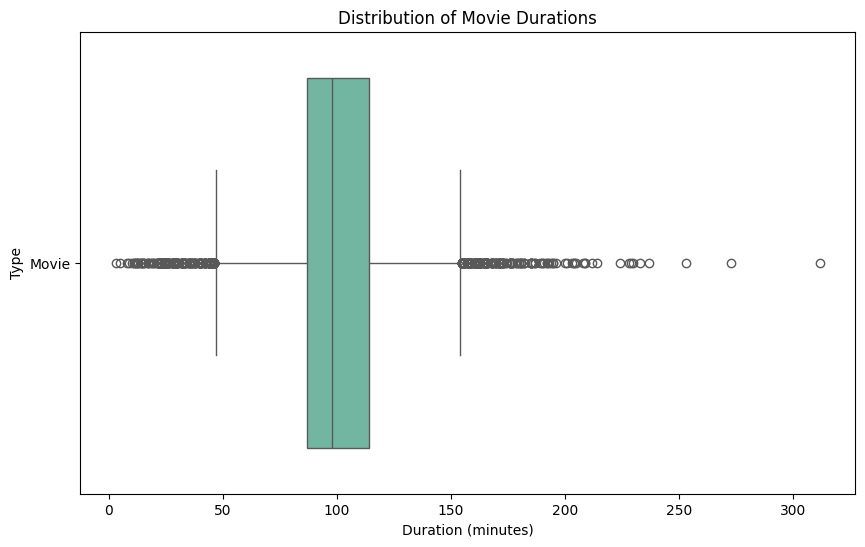

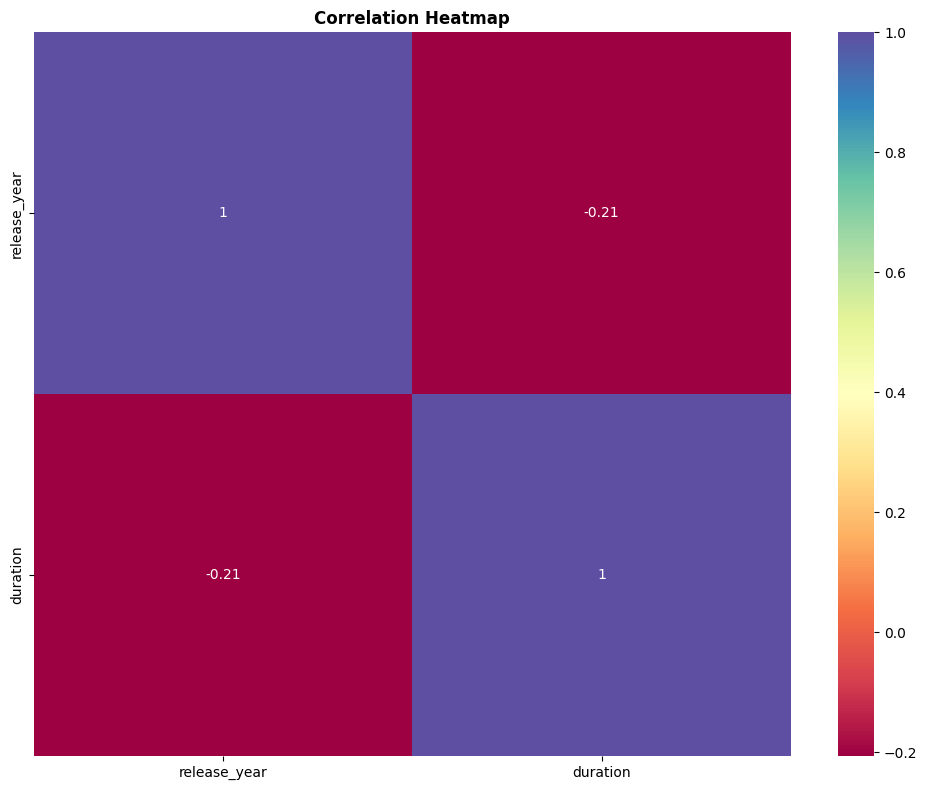

In [123]:
def data_visualization_seaborn(df):
    # Count Plot: Movies vs. TV Shows
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    sns.countplot(data=df, x='type', palette=['lightblue', 'pink'])    
    plt.title('Count of Movies vs. TV Shows', weight="bold")
    plt.xlabel('Type')
    plt.ylabel('Count')
    plt.show()

    # Box Plot: Distribution of Movie Durations
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='duration', y='type', data=df[df['type'] == 'Movie'], palette='Set2')
    plt.title('Distribution of Movie Durations')
    plt.xlabel('Duration (minutes)')
    plt.ylabel('Type')
    plt.show()

    # Correlation Heatmap
    plt.figure(figsize=(10, 8))
    # numeric_df = df[['duration', 'year_added']]  # Ensure only numeric columns are used
    numerical_cols = df.select_dtypes(include=['float64', 'int64'])
    correlation = numerical_cols.corr()
    sns.heatmap(correlation, annot=True, cmap='Spectral')
    plt.title('Correlation Heatmap', weight="bold")

    plt.tight_layout()
    plt.show()

data_visualization_seaborn(df)

Visualization Using Plotly

In [124]:
def data_visualization_plotly(df):
    movies_df = df[df['type'] == 'Movie'].dropna(subset=['duration'])
    fig = px.scatter(movies_df, x='release_year', y='duration',
                    title='Release Year vs. Duration for Movies',
                    labels={'release_year': 'Release Year', 'duration': 'Duration (minutes)'})
    fig.show()

    # Clean and analyze ratings
    df['rating'] = df['rating'].str.strip()
    df = df.dropna(subset=['rating'])
    rating_counts = df['rating'].value_counts().reset_index()
    rating_counts.columns = ['rating', 'count']

    # Pie Chart: Distribution of Content Ratings
    fig = px.pie(rating_counts, names='rating', values='count', title='Distribution of Content Ratings', 
                color_discrete_sequence=px.colors.qualitative.Prism)
    fig.show()

    # Interactive Line Chart: Content Added by Release Year
    content_per_year = df['release_year'].value_counts().sort_index()
    fig = px.line(x=content_per_year.index, y=content_per_year.values,
                title='<b>Trend of Content Added Over the Years</b>',
                labels={'x': 'Release Year', 'y': 'Number of Contents Added'})
    fig.show()

data_visualization_plotly(df)
